In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
# 데이터셋 준비
# transforms.Normalize((0.5,), (0.5,))의 경우, 평균과 표준 편차가 모두 0.5로 설정.
# MNIST 데이터셋과 같이 픽셀 값이 0에서 1 사이인 그레이스케일 이미지에 일반적으로 사용되는 설정

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
val_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.10MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 132kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.74MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
type(train_dataset)

(torchvision.datasets.mnist.MNIST, torch.Size([1, 28, 28]))

In [ ]:
train_dataset.data, train_dataset.data.shape

(tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         ...,
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0

In [ ]:
train_dataset.targets, train_dataset.targets.shape

(tensor([5, 0, 4,  ..., 5, 6, 8]), torch.Size([60000]))

In [ ]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
sliced_data = train_dataset.data[0]
sliced_data.shape

torch.Size([28, 28])

In [ ]:
sliced_data.unsqueeze(dim=0).shape

torch.Size([1, 28, 28])

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

How to calculate output size?

$outup\_size = \dfrac{(input\_size - kernel\_size +2 * padding)}{stride} + 1$

defalut value :

- padding : 0
- stride : 1

In [ ]:
# 기본적인 CNN 모델 정의
class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x) # (28-3+2*1)/1+1 = 28 -> 32x28x28
        x = self.relu(x)
        x = self.pool(x)  # ((28-2)/2+1 = 14 -> 32x14x14 : padding -> 0

        x = self.conv2(x) # (14-3+2*1)/1+1 = 14 -> 64x14x14
        x = self.relu(x)
        x = self.pool(x)  # (14-2)/2+1 = 7 -> 64x7x7

        # x.view(-1, 64 * 7 * 7) 코드의 최종 결과값은 변환된 텐서임.
        # 입력 텐서 x의 shape은 CNN의 마지막 convolutional layer의 출력 feature map의 shape로,
        # (batch_size, channels, height, width) 형태로 (batch_size, 64, 7, 7)이 됨.
        # x.view(-1, 64 * 7 * 7)를 실행하면, x의 shape이 (batch_size, 64 * 7 * 7)로 변경됨.
        # 즉, (batch_size, 3136) 형태(2차원)가 됨.

        x = x.view(-1, 64 * 7 * 7)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = BasicCNN()
model

BasicCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# 훈련 및 검증 기록을 위한 리스트
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
# 모델 훈련 함수
def train(model, loader):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, targets in loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

    return running_loss / total, correct / total

In [ ]:
# 모델 검증 함수
def validate(model, loader):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == targets).sum().item()
            total += targets.size(0)

    return running_loss / total, correct / total

In [ ]:
# 훈련 루프
epochs = 20
for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader)
    val_loss, val_acc = validate(model, val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

Epoch 1/20
Train Loss: 0.1509, Train Acc: 0.9547
Val Loss: 0.0599, Val Acc: 0.9802
Epoch 2/20
Train Loss: 0.0456, Train Acc: 0.9858
Val Loss: 0.0383, Val Acc: 0.9866
Epoch 3/20
Train Loss: 0.0305, Train Acc: 0.9907
Val Loss: 0.0418, Val Acc: 0.9869
Epoch 4/20
Train Loss: 0.0234, Train Acc: 0.9923
Val Loss: 0.0313, Val Acc: 0.9900
Epoch 5/20
Train Loss: 0.0161, Train Acc: 0.9947
Val Loss: 0.0303, Val Acc: 0.9903
Epoch 6/20
Train Loss: 0.0145, Train Acc: 0.9954
Val Loss: 0.0403, Val Acc: 0.9889
Epoch 7/20
Train Loss: 0.0107, Train Acc: 0.9965
Val Loss: 0.0316, Val Acc: 0.9904
Epoch 8/20
Train Loss: 0.0093, Train Acc: 0.9969
Val Loss: 0.0397, Val Acc: 0.9898
Epoch 9/20
Train Loss: 0.0073, Train Acc: 0.9973
Val Loss: 0.0384, Val Acc: 0.9906
Epoch 10/20
Train Loss: 0.0082, Train Acc: 0.9974
Val Loss: 0.0362, Val Acc: 0.9917
Epoch 11/20
Train Loss: 0.0055, Train Acc: 0.9980
Val Loss: 0.0611, Val Acc: 0.9865
Epoch 12/20
Train Loss: 0.0063, Train Acc: 0.9978
Val Loss: 0.0492, Val Acc: 0.9894
E

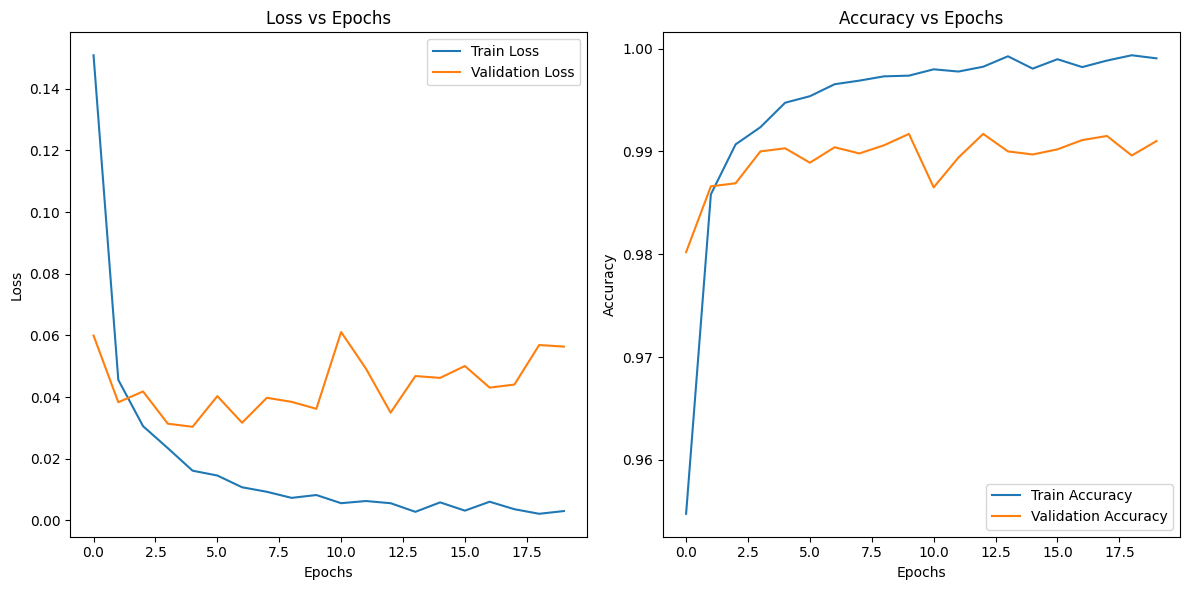

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()